In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("C:/Users/kimbj/workplace/datas/Salary_Data.csv")
dfs=pd.DataFrame(data=df)
dfs

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


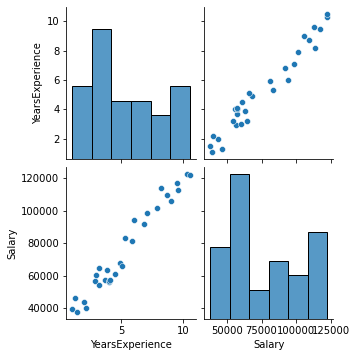

In [2]:
sns.pairplot(dfs)
plt.show()

In [3]:
df_target=dfs.drop(['Salary'],axis=1)

In [4]:
df_data=dfs.drop("YearsExperience", axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target,test_size=0.25,random_state=0)

In [6]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (1,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=10, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/10
1/1 [==============================] - 0s 101ms/step - loss: 26.7381 - mae: 4.4680 - val_loss: 45.5393 - val_mae: 5.9111
Epoch 2/10
1/1 [==============================] - 0s 56ms/step - loss: 26.4709 - mae: 4.4363 - val_loss: 45.0793 - val_mae: 5.8729
Epoch 3/10
1/1 [==============================] - 0s 55ms/step - loss: 26.2104 - mae: 4.4051 - val_loss: 44.6261 - val_mae: 5.8352
Epoch 4/10
1/1 [==============================] - 0s 70ms/step - loss: 25.9537 - mae: 4.3744 - val_loss: 44.1821 - val_mae: 5.7979
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 25.7005 - mae: 4.3437 - val_loss: 43.7446 - val_mae: 5.7609
Epoch 6/10
1/1 [==============================] - 0s 47ms/step - loss: 25.4501 - mae: 4.3132 - val_loss: 43.3072 - val_mae: 5.7237
Epoch 7/10
1/1 [==============================] - 0s 57ms/step - loss: 25.2007 - mae: 4.2844 - val_loss: 42.8769 - val_mae: 5.6868
Epoch 8/10
1/1 [==============================] - 0s 61ms/step - loss: 24.9536 - m

In [12]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 41.5376 - mae: 5.5716


[41.53761291503906, 5.571589469909668]

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


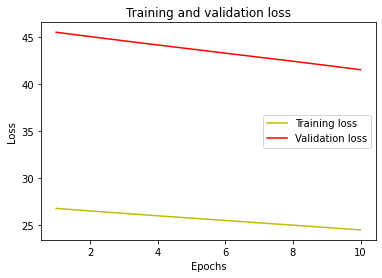

In [15]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'